# Exploratory Data Analysis

This will shown us how we can do EDA using python

# Three important steps to keep in mind are:

1- Understand the data
2- Clean the data
3- Find a relationship between data

In [145]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [146]:
kashti = sns.load_dataset("titanic")

In [147]:
kashti.to_csv("kashti.csv")

In [148]:
ks = kashti

In [149]:
# to know dataset type
ks.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [150]:
# rows and column numbers
ks.shape

(891, 15)

In [151]:
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [152]:
# unique values
ks.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [153]:
# column names
ks.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [154]:
ks['sex'].unique

<bound method Series.unique of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object>

In [155]:
ks['survived'],ks['alive'].unique


(0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: survived, Length: 891, dtype: int64,
 <bound method Series.unique of 0       no
 1      yes
 2      yes
 3      yes
 4       no
       ... 
 886     no
 887    yes
 888     no
 889    yes
 890     no
 Name: alive, Length: 891, dtype: object>)

# Cleaning and filtering the data

In [156]:
# find missing values inside
ks.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [157]:
ks.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [158]:
# removing missing value column (cleaning data)
ks_clean = ks.drop(['deck'], axis=1)
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [159]:
ks_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [160]:
ks_clean=ks_clean.dropna()

In [161]:
ks_clean.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [162]:
ks.shape

(891, 15)

In [163]:
ks_clean.shape

(712, 14)

In [164]:
ks_clean['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

In [165]:
ks.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [166]:
ks_clean.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [167]:
ks_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='age'>

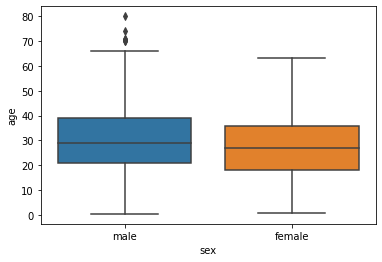

In [168]:
sns.boxplot(x='sex',y='age',data=ks_clean)

<AxesSubplot:ylabel='age'>

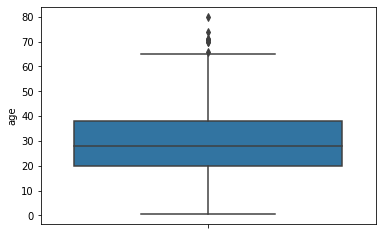

In [169]:
sns.boxplot(y='age',data=ks_clean)

C:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

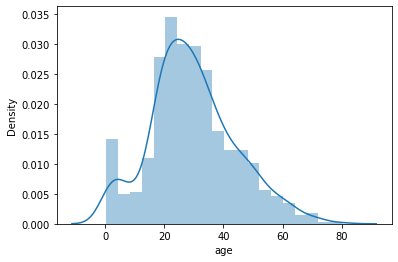

In [170]:
sns.distplot(ks_clean['age'])

In [171]:
# outliers removal
ks_clean['age'].mean()

29.64209269662921

In [172]:
ks_clean=ks_clean[ks_clean['age']<68]
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [173]:
ks_clean.shape

(705, 14)

In [174]:
ks_clean['age'].mean()


29.21797163120567

<AxesSubplot:ylabel='age'>

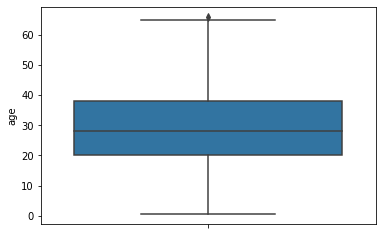

In [175]:
sns.boxplot(y='age',data=ks_clean)

In [176]:
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:>

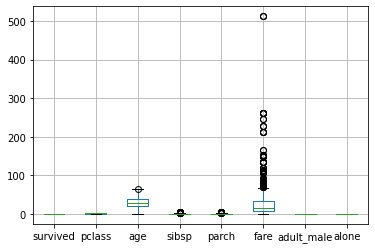

In [177]:
ks_clean.boxplot()

<AxesSubplot:>

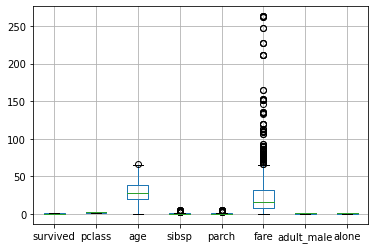

In [178]:
ks_clean = ks_clean[ks_clean['fare'] < 300]
ks_clean.boxplot()


C:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

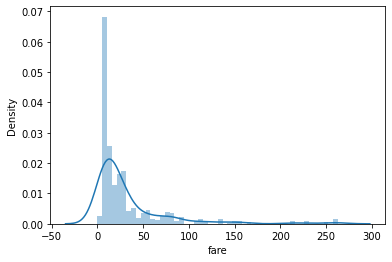

In [179]:
sns.distplot(ks_clean['fare'])


In [180]:
# log transformation
ks_clean['fare_log']=np.log(ks_clean['fare'])
ks_clean.head()

C:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672


ValueError: supplied range of [-inf, 5.572154032177765] is not finite

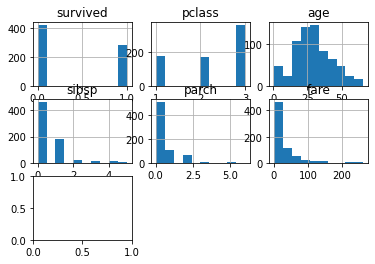

In [181]:
ks_clean.hist()

<AxesSubplot:>

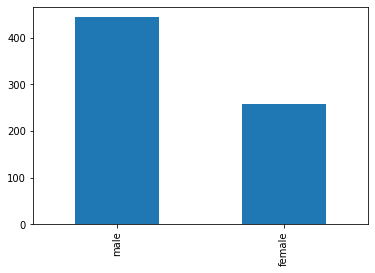

In [ ]:
pd.value_counts(ks_clean['sex']).plot.bar()

In [ ]:
ks_clean.groupby(['sex','class']).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.963415     1.0  34.231707  0.560976  0.512195  103.696393   
       Second  0.918919     2.0  28.722973  0.500000  0.621622   21.951070   
       Third   0.460784     3.0  21.750000  0.823529  0.950980   15.875369   
male   First   0.389474     1.0  40.067579  0.389474  0.336842   62.901096   
       Second  0.153061     2.0  30.340102  0.377551  0.244898   21.221429   
       Third   0.151394     3.0  26.143108  0.494024  0.258964   12.197757   

               adult_male     alone  
sex    class                         
female First     0.000000  0.353659  
       Second    0.000000  0.405405  
       Third     0.000000  0.372549  
male   First     0.968421  0.526316  
       Second    0.908163  0.632653  
       Third     0.888446  0.737052

In [ ]:
ks1 = kashti

In [ ]:
ks1.groupby(['sex','class','who']).mean()

survived  pclass     sibsp     parch        fare  \
sex    class  who                                                       
female First  child  0.666667     1.0  0.666667  1.666667  160.962500   
              man         NaN     NaN       NaN       NaN         NaN   
              woman  0.978022     1.0  0.549451  0.417582  104.317995   
       Second child  1.000000     2.0  0.700000  1.300000   29.240000   
              man         NaN     NaN       NaN       NaN         NaN   
              woman  0.909091     2.0  0.454545  0.500000   20.868624   
       Third  child  0.533333     3.0  1.533333  1.100000   19.023753   
              man         NaN     NaN       NaN       NaN         NaN   
              woman  0.491228     3.0  0.728070  0.719298   15.354351   
male   First  child  1.000000     1.0  0.666667  2.000000  117.802767   
              man    0.352941     1.0  0.302521  0.235294   65.951086   
              woman       NaN     NaN       NaN       NaN         NaN   
       Second child  1.000000     2.0  0.888889  1.222222   27.306022   
              man    0.080808     2.0  0.292929  0.131313   19.054124   
              woman       NaN     NaN       NaN       NaN         NaN   
       Third  child  0.321429     3.0  2.821429  1.321429   27.716371   
              man    0.119122     3.0  0.294671  0.128527   11.340213   
              woman       NaN     NaN       NaN       NaN         NaN   

                     adult_male     alone  
sex    class  who                          
female First  child         0.0  0.000000  
              man           NaN       NaN  
              woman         0.0  0.373626  
       Second child         0.0  0.000000  
              man           NaN       NaN  
              woman         0.0  0.484848  
       Third  child         0.0  0.166667  
              man           NaN       NaN  
              woman         0.0  0.482456  
male   First  child         0.0  0.000000  
              man           1.0  0.630252  
              woman         NaN       NaN  
       Second child         0.0  0.000000  
              man           1.0  0.727273  
              woman         NaN       NaN  
       Third  child         0.0  0.035714  
              man           1.0  0.824451  
              woman         NaN       NaN

# Relationship

In [ ]:
# realtionsip
cor_ks_clean = ks_clean.corr()

<AxesSubplot:>

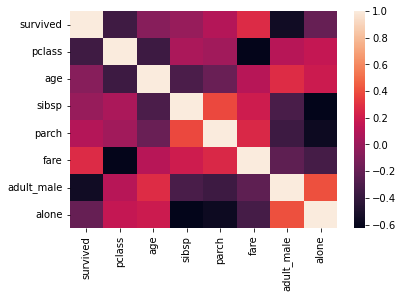

In [ ]:
sns.heatmap(cor_ks_clean)

<AxesSubplot:>

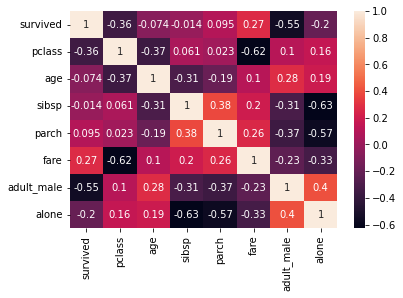

In [ ]:
sns.heatmap(cor_ks_clean, annot=True)

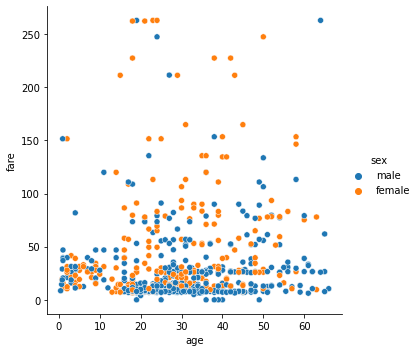

In [ ]:
sns.relplot(x='age',y='fare',hue="sex",data=ks_clean)

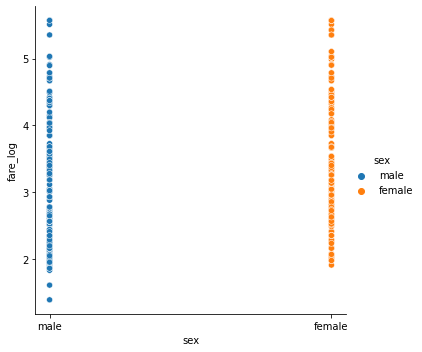

In [ ]:
sns.relplot(x='sex',y='fare_log',hue="sex",data=ks_clean)

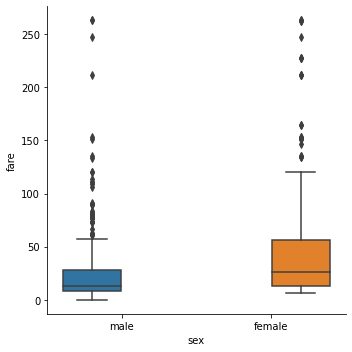

In [ ]:
sns.catplot(x='sex',y='fare',hue="sex",data=ks_clean,kind='box')

<AxesSubplot:ylabel='fare'>

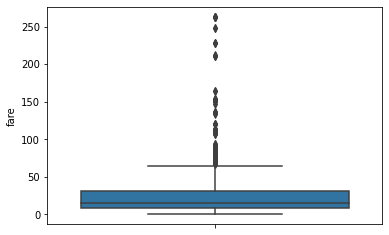

In [183]:
sns.boxplot(y='fare',data=ks_clean)

In [1]:
sns.boxplot(y='fare_log',data=ks_clean)

NameError: name 'sns' is not defined

In [2]:
pip install skylearn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement skylearn (from versions: none)
ERROR: No matching distribution found for skylearn
You should consider upgrading via the 'C:\Users\Anonymous\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
